#1. [R] What is a suitable initial choice of B (denoted by B0)? Justify with proper reasons.

#Solution:  In the BFGS  approach, the inverse of the Hessian matrix approximation is updated after each iteration. The algorithm's convergence depends critically on the initial approximation of the inverse Hessian matrix, B0.

#The identity matrix is a good initial choice for B0 since it assumes that the first inverse Hessian approximation is equal to the real Hessian. The first step size is made sure to be just right by the identity matrix to prevent the algorithm from diverging. Additionally, because the algorithm has greater freedom to explore the optimization space when it starts with an identity matrix, the possibility of getting stuck in a subpar local minimum is decreased.

In [ ]:
import numpy as np
from timeit import default_timer as timer

In [ ]:
n = 100
B = np.random.rand(n, n)
A = np.matmul(B,B.T) 
A = np.add(A, 0.001*np.identity(n)) 
Start_time = timer()
A_Inv = np.linalg.inv(A)
end_time = timer()
print('Time taken to compute Inverse of A:',end_time-Start_time)

Time taken to compute Inverse of A: 0.028934746980667114


In [ ]:
def evalf(x,n):  
  assert type(x) is np.ndarray and len(x) == n 
  funC_vl = 0
  for i in range(n-1):   
    funC_vl = funC_vl + 4*(x[i]**2 - x[i+1])**2 + (x[i] - 1)**2 
  return funC_vl  

In [ ]:
def evalg(x,n):  
  assert type(x) is np.ndarray and len(x) == n
  grad_list = [16*(x[0]**2 - x[1])*x[0] + 2*(x[0] -1)]
  for i in range(n-2):
     grad_list.append(16*((x[i+1])**2 - x[i+2])*x[i+1] + 2*(x[i+1] -1) - 8*((x[i])**2 - x[i+1]))
  grad_list.append(- 8*((x[n-2])**2 - x[n-1]))   
  a=np.array(grad_list).reshape((n,1))
  return a

In [ ]:
def compute_steplength_backtracking(n,x, gradf, direction, alpha_start, rho, gamma):
  assert type(x) is np.ndarray and len(x) == n 
  assert type(gradf) is np.ndarray and len(gradf) == n  
  assert type(direction) is np.ndarray and len(gradf) == n
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  while evalf(x + alpha*direction, n)>evalf(x, n)+gamma*alpha*np.matmul(gradf.T, direction):
    alpha=rho*alpha
  return alpha

In [ ]:
BACKTRACKING_LINE_SEARCH = 1
CONSTANT_STEP_LENGTH=2
EXACT_LINE_SEARCH=3

In [ ]:
def find_minimizer_BFGS(n,start_x, tol, *args):
  assert type(start_x) is np.ndarray  and len(start_x) == n
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x,n)
  B_k = np.identity(n)/8
  alpha_start = args[0]
  rho = args[1]
  gamma = args[2]
  k=0
  while (np.linalg.norm(g_x) > tol):
    p_k = -np.matmul(B_k, g_x)
    step_length = compute_steplength_backtracking(n, x, g_x, p_k, alpha_start, rho, gamma)
    x_0 = x
    x = x + np.multiply(step_length,p_k) 
    s_k = x - x_0
    y_k = evalg(x,n)-evalg(x_0,n)
    u_k = (np.matmul(y_k.T,s_k))**(-1)

    first_term = np.identity(n) - u_k*np.matmul(s_k,y_k.T)
    sec_term = np.identity(n)- u_k*np.matmul(y_k, s_k.T)
    B_k = np.matmul(np.matmul(first_term,B_k),sec_term) + u_k*np.matmul(s_k,s_k.T)
    k += 1
    g_x = evalg(x,n)
  return x, evalf(x,n), k

#3. [R] Take n ∈ {1000, 2500, 5000, 7500, 10000}, find minimizer of the objective function in each case and compute the time taken by the BFGS method with backtracking line search. Tabulate the time taken by BFGS method for each n.

#Solution:

In [ ]:
n_values = [1000,2500,5000,7500,10000]
my_tol = 10**(-3)
time_takken = []
obj = []
x = []
iteration_list = []
for n in n_values:
  start_x = np.array([0 for i in range(n)]).reshape((n,1))
  time1 = timer()
  x_min ,k,func  = find_minimizer_BFGS(n, start_x, my_tol, 0.9, 0.5 ,0.5 )
  time2 = timer()
  iteration_list.append(k)
  x.append(x_min)
  obj.append(func)
  time = time2 - time1
  time_takken.append(time)


/opt/anaconda3/install/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in reciprocal
/opt/anaconda3/install/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply
/opt/anaconda3/install/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply
/opt/anaconda3/install/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


In [ ]:
import pandas as pd
df=pd.DataFrame()
df['n_value'] = n_values
df['time_takken']=time_takken


In [ ]:
df

n_value  time_takken
0     1000    18.315405
1     2500    65.430172
2     5000   350.677067
3     7500   304.788077
4    10000  1371.510994

#5. [R] Take n ∈ {1000, 2500, 5000, 7500, 10000}, find minimizer of the objective function in each case and compute the time taken by the Newton’s method with backtracking line search. Tabulate the time taken by Newton’s method for each n.

#Solution:

In [ ]:
def evalh(n, x):
  assert type(x) is np.ndarray and len(x) == n
  hessien = np.zeros((n,n)) 
  hessien[0][0] = 48*(x[0])**2 - 16*x[1] + 2
  hessien[0][1] = -16*x[0]
  for i in range(n-2): 
      hessien[i+1][i+1] = 8 + 16*(x[i+1]**2 - x[i+2]) + 32*x[i+1]**2 +2
      hessien[i+1][i+2] = -16*x[i+1]
      hessien[i+1][i] =  hessien[i][i+1]  
      hessien[n-1][n-2] = hessien[n-2][n-1]
      hessien[n-1][n-1] = 8
  return hessien

In [ ]:
def find_minimizer_newton(n, start_x, tol,line_search_type, *args):
  assert type(start_x) is np.ndarray and len(start_x)  == n 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg( x, n)
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
  k=0
  while (np.linalg.norm(g_x) > tol):
    D_k = np.linalg.inv(evalh(n, x))
    p_k = -np.matmul(D_k, g_x)
    step_length = compute_steplength_backtracking(n,x, g_x, p_k, alpha_start, rho, gamma)
    x = np.add(x, np.multiply(step_length,p_k))
    k += 1  
    g_x = evalg(x, n ) 
  return x, k, evalf(x, n)

In [ ]:
my_tol = 10**(-3)
alpha = 0.9
rho = 0.5
gamma = 0.5
time_takken_newton = []
obj_newton = []
x_newton = []
iteration_list_newton = []
for n in n_values:
  start_x = np.array([0 for j in range(n)]).reshape((n,1))
  time1_n = timer()
  x_min_n ,k_n ,fun_n  = find_minimizer_newton(n, start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, gamma )
  time2_n = timer()
  iteration_list_newton.append(k_n)
  x_newton.append(x_min_n)
  obj_newton.append(fun_n)
  time_n = time2_n - time1_n
  time_takken_newton.append(time_n)

KeyboardInterrupt: 

#Its taking lots of time

#6. [R] Compare the time taken by BFGS method with backtracking line search against the time taken by Newton’s method with backtracking line search for each value of n. Plot the time taken by both methods vs n using different colors. Comment on your observations.

#Solution

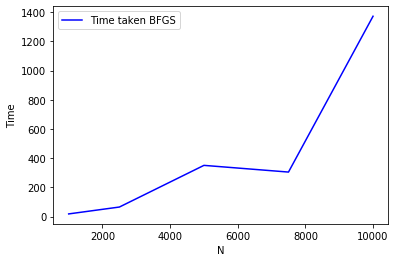

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['n_value'] , df['time_takken'],color = "blue")
plt.legend(["Time taken BFGS"])
plt.xlabel("N")
plt.ylabel("Time")
plt.show()

#when values of n are increses the time is eventually increses